reference: https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend/notebook#Recommender-Systems

In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd

In [2]:
import os
path = '/kaggle/input/gtzan-dataset-music-genre-classification/Data'
print(list(os.listdir(f'{path}/genres_original/')))


['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [3]:
# Importing 1 file
y_pop, sr_pop = librosa.load(f'{path}/genres_original/pop/pop.00036.wav')

print('y:', y_pop, '\n')
print('y shape:', np.shape(y_pop), '\n')
print('Sample Rate (KHz):', sr_pop, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661504/22050)

y: [-0.19229126 -0.08969116  0.02322388 ... -0.16653442 -0.0585022
  0.01345825] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.00018140589569


The sample rate of 22050 Hz was commonly used in early digital audio formats, such as the Audio Compact Disc (CD), which was introduced in the 1980s. CD audio is sampled at a rate of 44.1 kHz, which is twice the sample rate of 22050 Hz.

The reason why 44.1 kHz was chosen as the standard for CD audio is because it is capable of accurately representing audio frequencies up to 20 kHz, which is the upper limit of human hearing.

In [4]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
y_pop, _ = librosa.effects.trim(y_pop)

# the result is an numpy ndarray
print('Audio File:', y_pop, '\n')
print('Audio File shape:', np.shape(y_pop))

Audio File: [-0.19229126 -0.08969116  0.02322388 ... -0.16653442 -0.0585022
  0.01345825] 

Audio File shape: (661504,)


### 2D Representation: Sound Waves¶

Note on waveshow: x-axis represents time and the y-axis represents the amplitude of the audio signal.

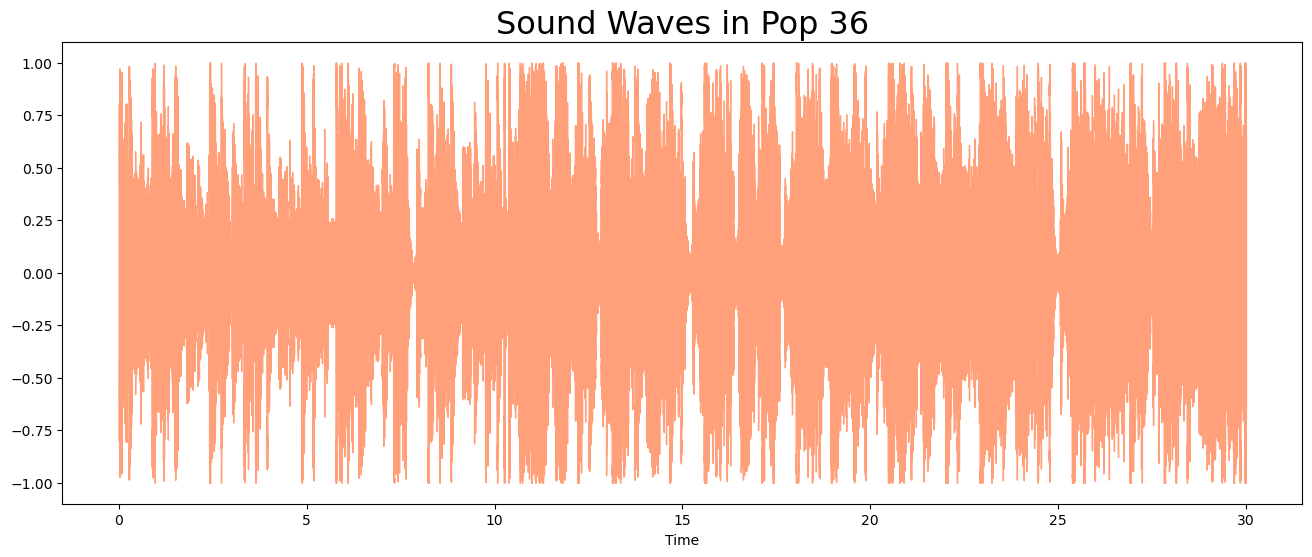

In [5]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=y_pop, sr=sr_pop, color='#FFA07A')
plt.title("Sound Waves in Pop 36", fontsize = 23);

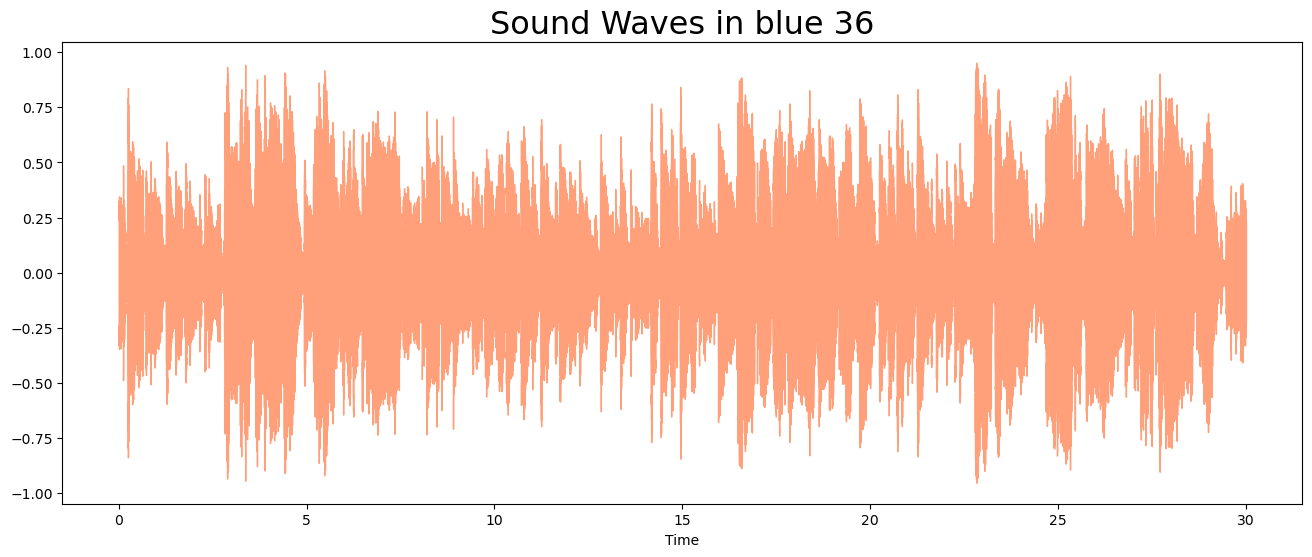

In [6]:
y_blue, sr_blue = librosa.load(f'{path}/genres_original/blues/blues.00036.wav')

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=y_blue, sr=sr_blue, color='#FFA07A')
plt.title("Sound Waves in blue 36", fontsize = 23);

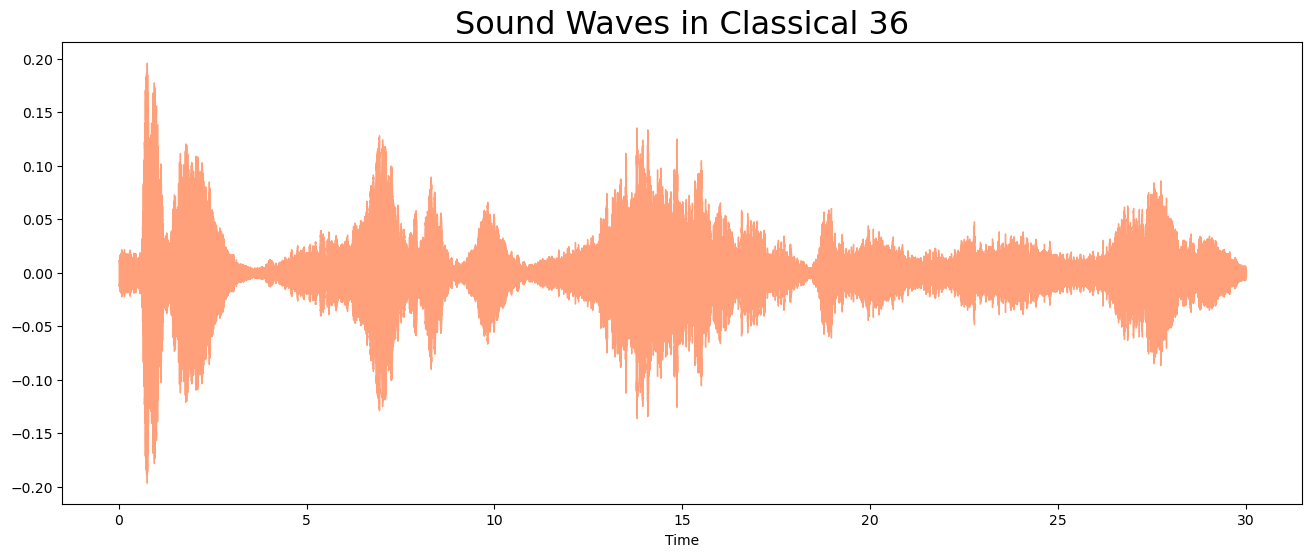

In [7]:
y_classical, sr_classical = librosa.load(f'{path}/genres_original/classical/classical.00036.wav')

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=y_classical, sr=sr_classical, color='#FFA07A')
plt.title("Sound Waves in Classical 36", fontsize = 23);

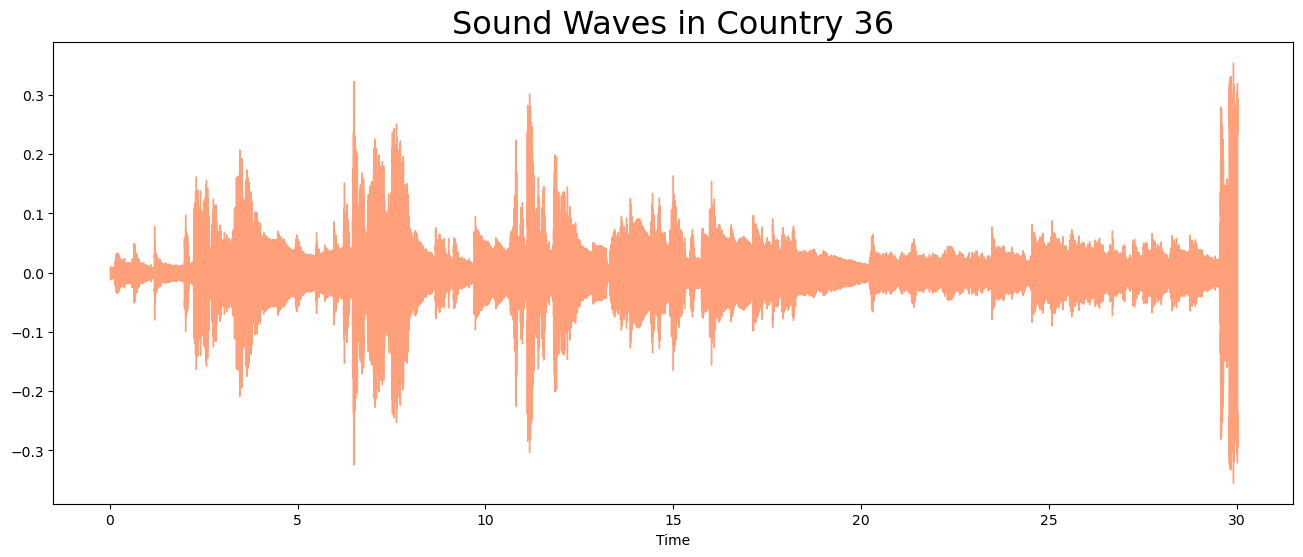

In [8]:
y_country, sr_country = librosa.load(f'{path}/genres_original/country/country.00036.wav')

plt.figure(figsize = (16, 6))
librosa.display.waveshow(y=y_country, sr=sr_country, color='#FFA07A')
plt.title("Sound Waves in Country 36", fontsize = 23);

## Fourier Transform

Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [9]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(y_pop, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


The purpose of STFT is to add the time dimension back by breaking down signals into windows. (Window length: the time length of the window, hope length: the extent of window overlapping. The longer the hop length, the higher the freq resolutions (larger segments of the audio signals), but the lower the time resolution (few frames per unit of time) We then perform a Fourier transformation of the window to understand the pattern of the sounds.

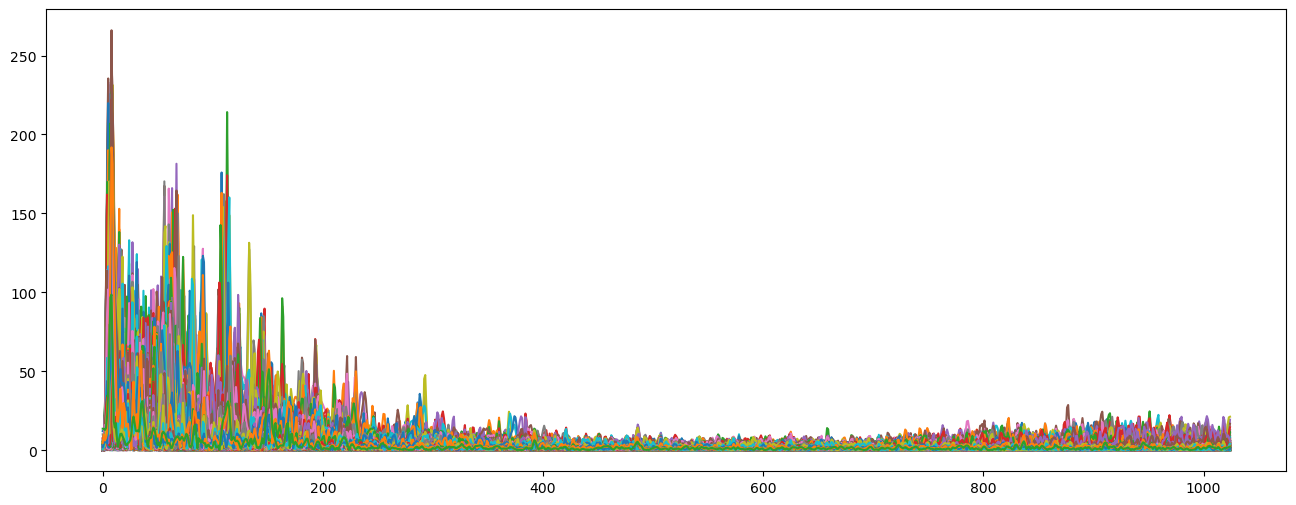

In [10]:
plt.figure(figsize = (16, 6))
plt.plot(D);

The resulting plot will show the frequency content of the audio signal over time. The x-axis of the plot represents time, with each point on the axis corresponding to a different time frame. The y-axis represents the frequency content of the signal, with each point on the axis corresponding to a different frequency band.

## Spectrogram

The horizontal axis of a spectrogram represents time, while the vertical axis represents frequency. The intensity of the spectrogram is represented by color or grayscale, with brighter colors indicating higher intensity or amplitude at a given frequency.

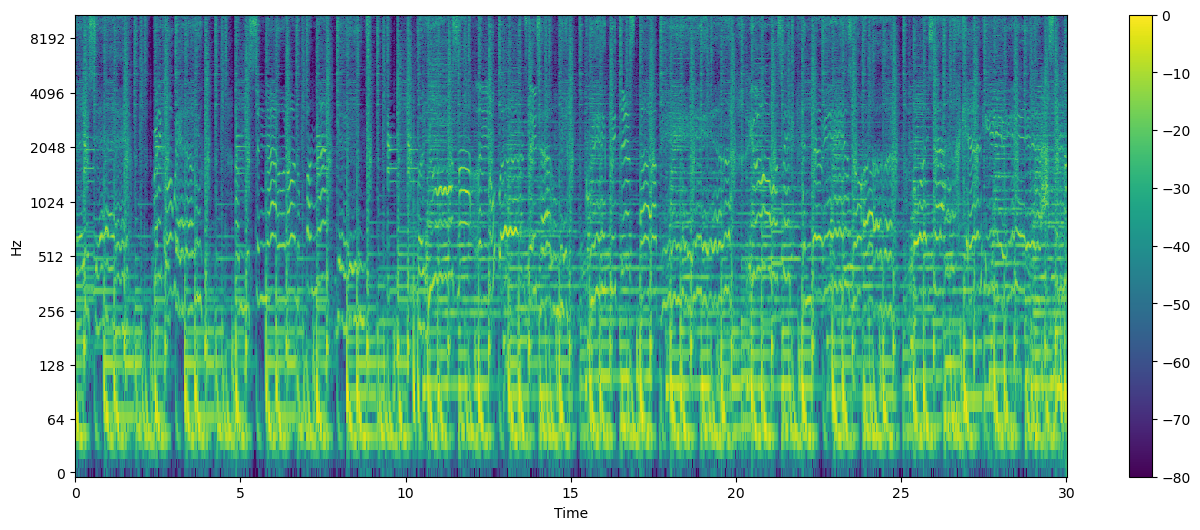

In [11]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr_pop, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'viridis')
plt.colorbar();

## Mel Spectrogram

Mel Scale - frequency for humans (Reason: human perceive the sound distance unlinearly)


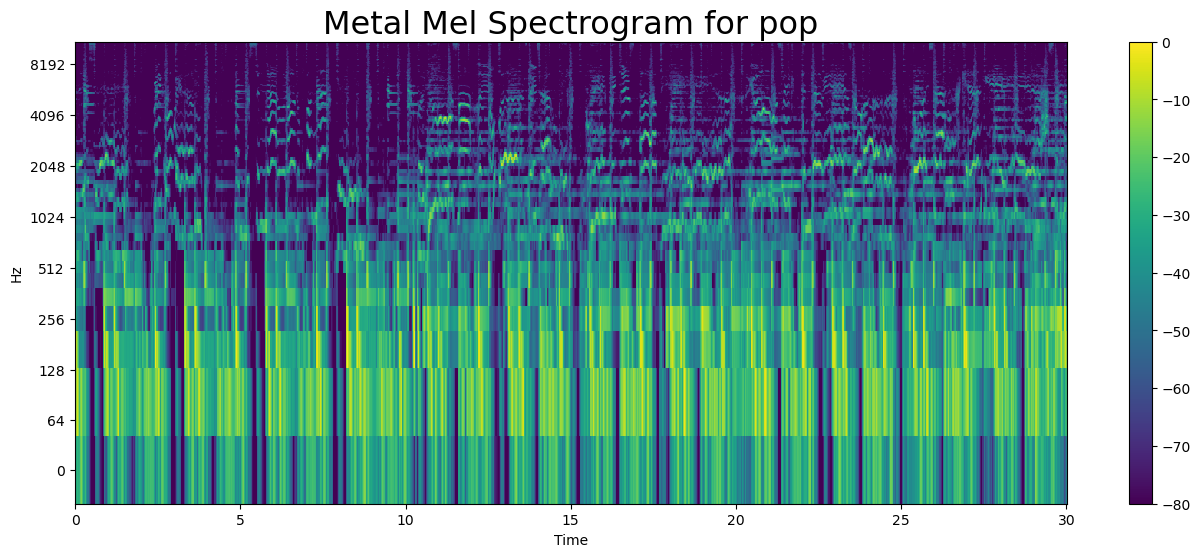

In [12]:
# y, sr = librosa.load(f'{path}/genres_original/metal/metal.00036.wav')
# y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y = y_pop, sr=sr_pop)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr_pop, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'viridis');
plt.colorbar();
plt.title("Metal Mel Spectrogram for pop", fontsize = 23);


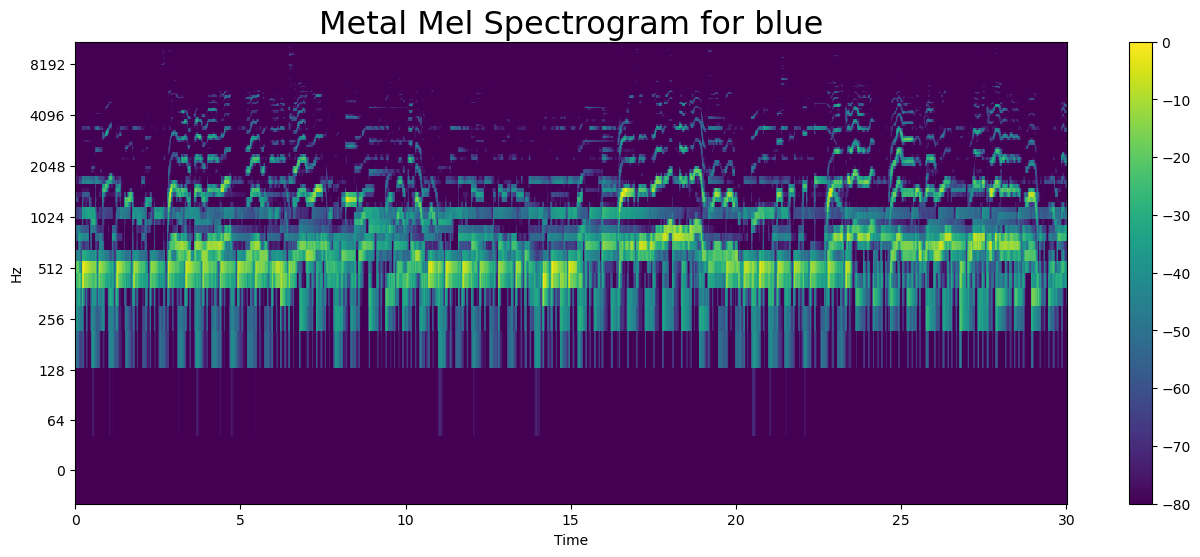

In [13]:
S = librosa.feature.melspectrogram(y = y_blue, sr=sr_blue)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr_blue, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'viridis');
plt.colorbar();
plt.title("Metal Mel Spectrogram for blue", fontsize = 23);

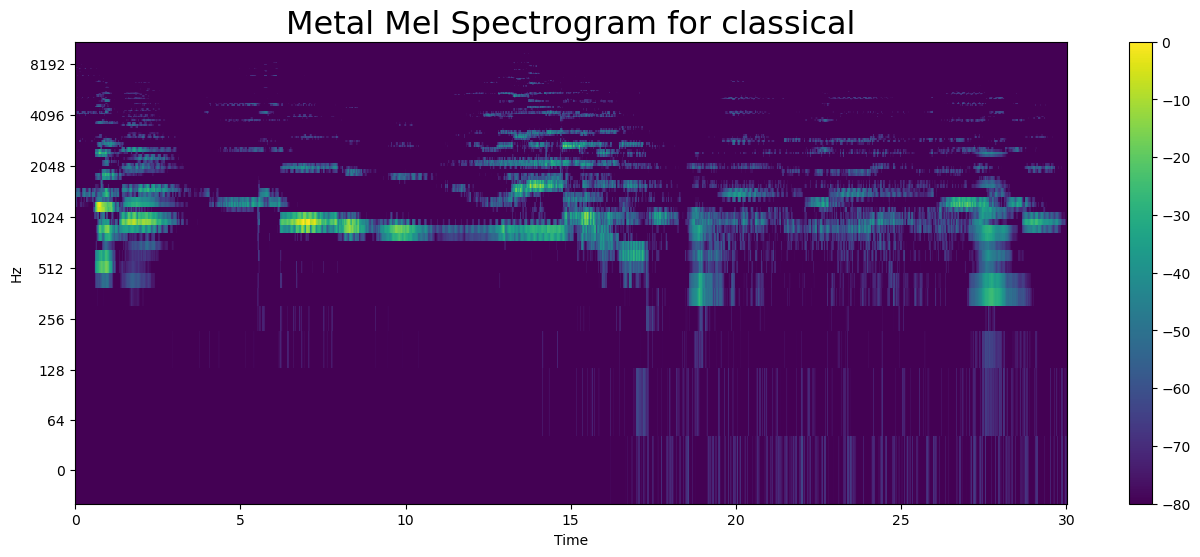

In [14]:

S = librosa.feature.melspectrogram(y = y_classical, sr=sr_classical)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr_classical, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'viridis');
plt.colorbar();
plt.title("Metal Mel Spectrogram for classical", fontsize = 23);


Observations: Pop music have higher amplitudes. Blue music have smaller range of freuqency. Classical music seems to have the most dynamic frequency. 

## Audio Features


Zero Crossing Rate: Zero Crossing Rate (ZCR) is a measure of the number of times a signal crosses the zero-axis (amplitude) in a given time frame.



In [15]:
# Total zero_crossings for pop
zero_crossings = librosa.zero_crossings(y_pop, pad=False)
print(sum(zero_crossings))

76229


In [16]:
# Total zero_crossings for blue
zero_crossings = librosa.zero_crossings(y_blue, pad=False)
print(sum(zero_crossings))

24463


In [17]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(y_classical, pad=False)
print(sum(zero_crossings))

39405


Harmonics and percussive

The x-axis represents time and the y-axis represents the amplitude of the signal.

Text(0.5, 1.0, 'Harmonics and percussive for pop')

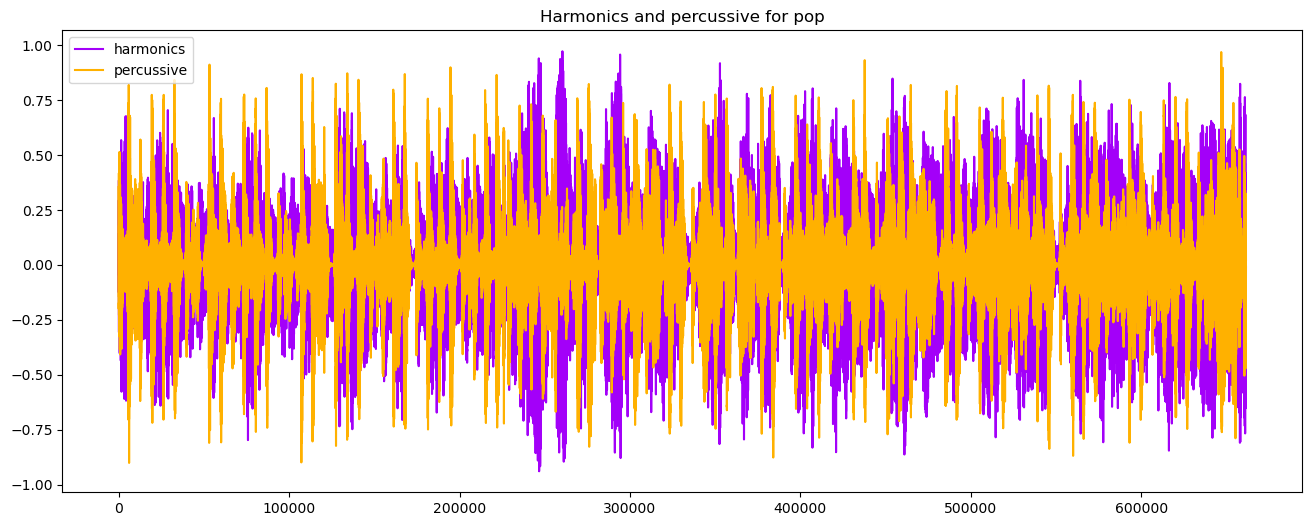

In [18]:
y_harm, y_perc = librosa.effects.hpss(y_pop)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9', label = 'harmonics');
plt.plot(y_perc, color = '#FFB100', label = 'percussive');
plt.legend()
plt.title('Harmonics and percussive for pop')

Text(0.5, 1.0, 'Harmonics and percussive for blue')

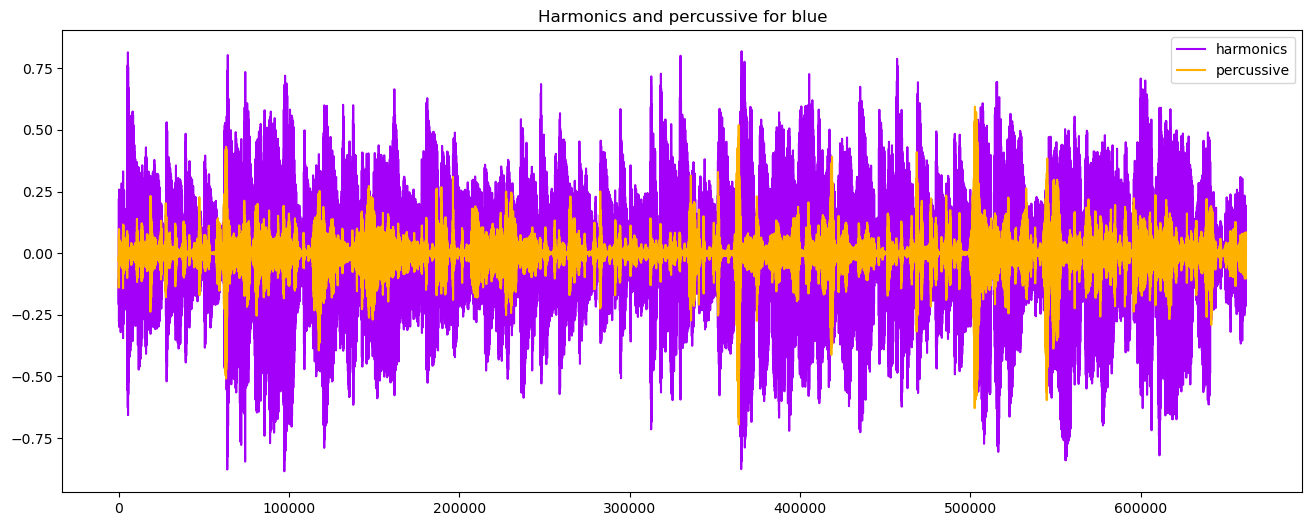

In [19]:
y_harm, y_perc = librosa.effects.hpss(y_blue)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9', label = 'harmonics');
plt.plot(y_perc, color = '#FFB100', label = 'percussive');
plt.legend()
plt.title('Harmonics and percussive for blue')

Text(0.5, 1.0, 'Harmonics and percussive for classical')

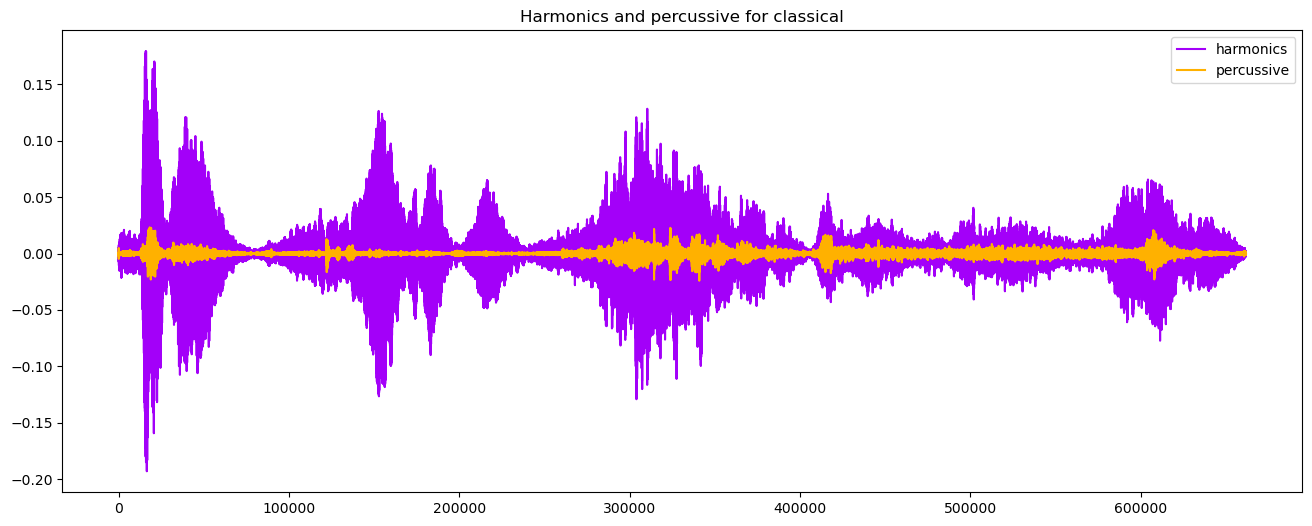

In [20]:
y_harm, y_perc = librosa.effects.hpss(y_classical)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9', label = 'harmonics');
plt.plot(y_perc, color = '#FFB100', label = 'percussive');
plt.legend()
plt.title('Harmonics and percussive for classical')

Tempo BMP (beats per minute)

In [21]:
tempo, _ = librosa.beat.beat_track(y = y_pop, sr = sr_pop)
tempo

99.38401442307692

### MFCC
A compressed representation of the Mel Spectrograms by the most essential frequency coef. 

The x-axis of the MFCCs plot represents time, and the y-axis represents the MFCC coefficient values.

mfccs shape: (20, 1293)


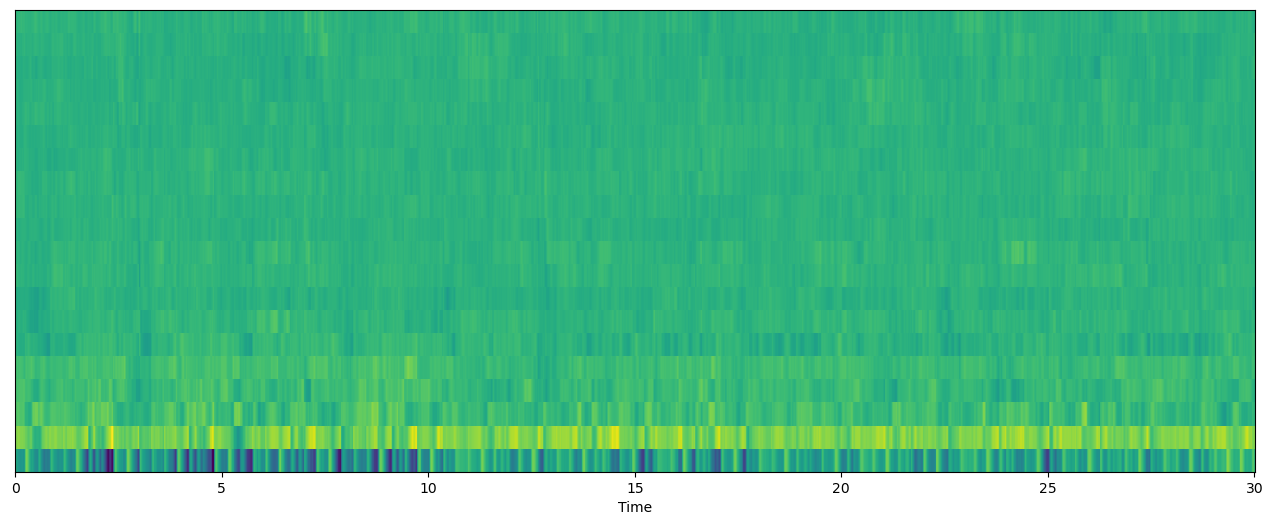

In [22]:
mfccs = librosa.feature.mfcc(y = y_pop, sr=sr_pop)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr_pop, x_axis='time', cmap = 'viridis');

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:255: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  "Numerical issues were encountered "


Mean: -8.8508056e-10 

Var: 1.0


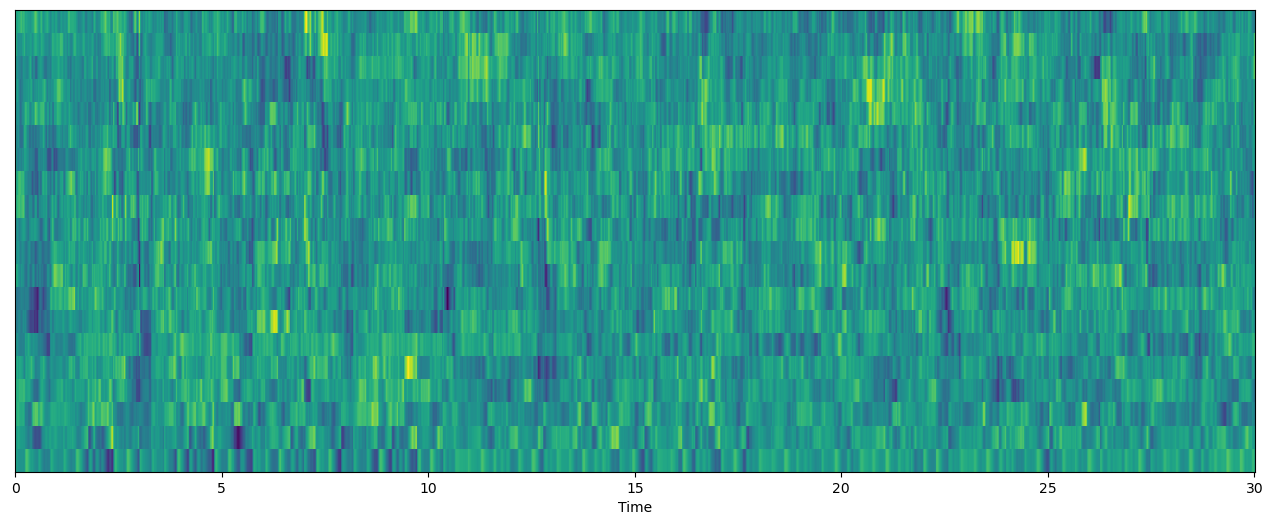

In [23]:
# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean:', mfccs.mean(), '\n')
print('Var:', mfccs.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr_pop, x_axis='time', cmap = 'viridis');

In [24]:
print(mfccs)

[[ 0.09206967  0.386109    0.11332224 ...  1.2038207   1.370697
   0.82737666]
 [ 0.261416    0.34526667  0.45118928 ...  0.31910515  0.11388599
   0.18868299]
 [ 0.982792    0.8726585   1.0931873  ... -0.43070954 -0.5778949
  -0.7612656 ]
 ...
 [-0.3281499  -0.04034494 -0.27681285 ...  0.5647969   1.3951573
   2.149969  ]
 [ 0.73992115  0.7570349  -0.0860803  ... -0.20964925  0.4498771
   1.7667277 ]
 [ 0.89229167  0.740195    0.5544096  ... -0.81152534 -1.0920752
  -0.8995395 ]]


## EDA

In [25]:
data = pd.read_csv(f'{path}/features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
